# <center>Data Analytics laboratory </center>

## <center>Model comparison</center>

In [43]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as npx
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Exercise 1

In [44]:
%%writefile code_1_lab_6.stan

data {
    int<lower=1> N; //number of samples
}

generated quantities{

    real theta = 0.01; 
    array [N] real y;
    for (i in 1:N) {
        /* code */
        if (bernoulli_rng(theta)) { 
            y[i] = normal_rng(10,10); 
        }
        else {
        y[i] = normal_rng(0,1);
        }
    }
}

Overwriting code_1_lab_6.stan


In [45]:
%%writefile code_2_lab_6.stan

data {
    int<lower=1> N; //number of samples
}

generated quantities {
    matrix [N, 3] X;
    {vector [N] zeros = rep_vector(0,N);
    for (j in 1:3) {
        X[:,j]=to_vector(normal_rng(zeros,1));
        /* code */
    }
    }   

    vector [3] beta;
    beta = [2, 1, 0.5]';
    array [N] real y;
    y = normal_rng(X*beta, 1);
}

Overwriting code_2_lab_6.stan


In [105]:
N = (len("Radoslaw") + len("szpot"))*100
stan_data = {"N": N}

# Compile code_1.stan and code_2.stan
model_1 = CmdStanModel(stan_file='code_1_lab_6.stan')
model_2 = CmdStanModel(stan_file='code_2_lab_6.stan')


# Generate data for rest of excercises.
fit_1 = model_1.sample(data=stan_data, iter_sampling=1, chains=1)
fit_2 = model_2.sample(data=stan_data, iter_sampling=1, chains=1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


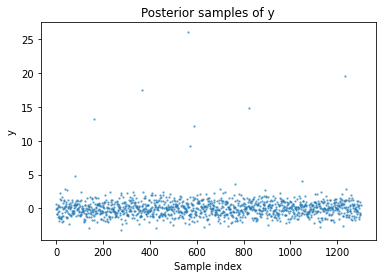

In [106]:
# Plot fit1 data
y_1 = fit_1.draws_pd().loc[:, 'y[1]':'y[1300]']
y_1_flat = y_1.values.flatten()

# plot the posterior samples as a scatter plot
plt.scatter(range(len(y_1_flat)), y_1_flat, s=2, alpha=0.5)
plt.xlabel('Sample index')
plt.ylabel('y')
plt.title('Posterior samples of y')
plt.show()

X_2 shape:
(4000, 3900)
X_2: transformed shape:
(4000, 1300)
y_2 shape:
(1, 1300)


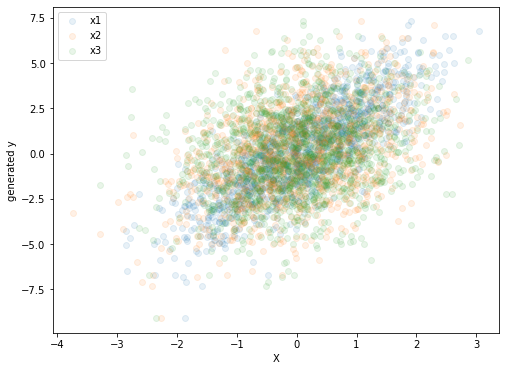

In [110]:
# Plot fit2 data
fit_2.draws_pd().head()
X_2_1 = fit_2.draws_pd().loc[:, 'X[1,1]':'X[1300,1]']
X_2_2 = fit_2.draws_pd().loc[:, 'X[1,2]':'X[1300,2]']
X_2_3 = fit_2.draws_pd().loc[:, 'X[1,3]':'X[1300,3]']
y_2 = fit_2.draws_pd().loc[:, 'y[1]':'y[1300]']
print(f"X_2 shape:\n{X_2.shape}")
print(f"X_2: transformed shape:\n{X_2[:, 0:1300].shape}")
print(f"y_2 shape:\n{y_2.shape}")

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_2_1, y_2, label='x1', alpha=0.1)
ax.scatter(X_2_2, y_2, label='x2', alpha=0.1)
ax.scatter(X_2_3, y_2, label='x3', alpha=0.1)
ax.set_xlabel('X')
ax.set_ylabel('generated y')
ax.legend()
plt.show()

## Exercise 2

In [68]:
%%writefile code_3_lab_6.stan

data {
    int N; //number of samples
    array [N] real y;//measurements
}
parameters {
    real<lower=0> sigma;
    real mu;
}
model {
    target+=-2*log(sigma);
    target+=normal_lpdf(y|mu, sigma);
}
generated quantities {
    vector [N] log_lik;
    array [N] real y_hat;
    for (j in 1:N) {
        log_lik[j] = normal_lpdf(y[j] | mu, sigma); 
        y_hat[j] = normal_rng(mu, sigma);
    }
}

Overwriting code_3_lab_6.stan


In [69]:
%%writefile code_4_lab_6.stan


data {
    int N; //number of samples
    array [N] real y;//measurements
}
parameters {
    real<lower=0> sigma;
    real mu;
    real<lower=0> nu;
}
model {
    target+=-2*log(sigma);
    target+=gamma_lpdf(nu|2,0.1);
    target+=student_t_lpdf(y|nu,mu,sigma);
}
generated quantities{
    vector [N] log_lik;
    array [N] real y_hat;
    for (j in 1:N) {
        log_lik[j] = student_t_lpdf(y[j]|nu,mu,sigma);
        y_hat[j] = student_t_rng(nu, mu, sigma);
    }
}


Overwriting code_4_lab_6.stan


In [109]:
# Compile both models
model_3 = CmdStanModel(stan_file='code_3_lab_6.stan')
model_4 = CmdStanModel(stan_file='code_4_lab_6.stan')

stan_data = {"N": N, "y": y_1_flat.reshape((1300,))}

# Fit both models
fit_3 = model_3.sample(data=stan_data)
fit_4 = model_4.sample(data=stan_data)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status



chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status




chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [116]:
# Using az.compare and az.plot_compare analyze both models using loo and waic criteria.

# Convert CmdStanMCMC objects to InferenceData objects
idata_3 = az.from_cmdstanpy(fit_3)
idata_4 = az.from_cmdstanpy(fit_4)

In [117]:
idata_3

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats

In [118]:
idata_4

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats

comparison table:
         rank          loo      p_loo       d_loo        weight          se  \
model_4     0 -1967.240796   5.204735    0.000000  1.000000e+00   40.044690   
model_3     1 -2478.677333  41.987565  511.436536  2.582766e-09  186.416488   

                dse  warning loo_scale  
model_4    0.000000    False       log  
model_3  159.813799     True       log  


<AxesSubplot:xlabel='Log'>

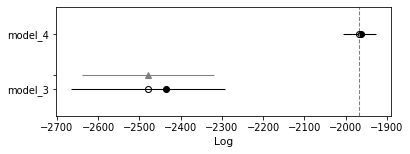

In [119]:
# Compare the models using loo and waic criteria
comp_df = az.compare({"model_3": idata_3, "model_4": idata_4}, ic="loo")
print(f"comparison table:\n{comp_df}")
az.plot_compare(comp_df)

comparison table:
         rank         waic     p_waic      d_waic        weight          se  \
model_4     0 -1967.180947   5.144885    0.000000  1.000000e+00   40.025459   
model_3     1 -2485.234515  48.544747  518.053568  7.614176e-10  191.113831   

                dse  warning waic_scale  
model_4    0.000000     True        log  
model_3  164.731831     True        log  


<AxesSubplot:xlabel='Log'>

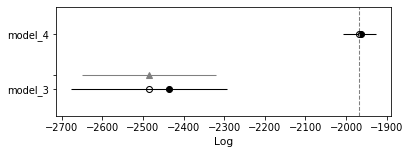

In [120]:
# Compare the models using loo and waic criteria
comp_df = az.compare({"model_3": idata_3, "model_4": idata_4}, ic="waic")
print(f"comparison table:\n{comp_df}")
az.plot_compare(comp_df)

## Exercise 3

In [121]:
%%writefile code_5_lab_6.stan

data {
    int N; //number of samples 
    int K; //number of predictors 
    array [N] real y;//measurements 
    matrix [N,K] X;//design matrix
}
parameters {
    real<lower=0> sigma;
    vector [K] beta;
}
transformed parameters { 
    /* ... declarations ... statements... */
    vector [N] mu;
    mu = X*beta;
}
model {
    y~ normal (mu, sigma);
}
generated quantities {
    vector [N] log_lik;
    array [N] real y_hat;
    for (j in 1:N) {
    log_lik[j] = normal_lpdf(y[j] | mu[j], sigma); 
    y_hat[j] = normal_rng(mu [j], sigma);
    }
}

Writing code_5_lab_6.stan


In [122]:
# Compile model
model_5 = CmdStanModel(stan_file='code_5_lab_6.stan')

INFO:cmdstanpy:compiling stan file /code_5_lab_6.stan to exe file /code_5_lab_6
INFO:cmdstanpy:compiled model executable: /code_5_lab_6


In [123]:
# Compare models for 1, 2 and 3 predictors as in previous excercise
data_fit = {'N': N, 'K': 1, 'y': y_2.values.reshape((N,)), 'X': X_2_1.values.reshape((N,1))}
predictor_1 = model_5.sample(data=data_fit)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:01 Iteration: 1900 / 2000 [ 95%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [124]:
data_fit = {'N': N, 'K': 1, 'y': y_2.values.reshape((N,)), 'X': X_2_2.values.reshape((N,1))}
predictor_2 = model_5.sample(data=data_fit)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [125]:
data_fit = {'N': N, 'K': 1, 'y': y_2.values.reshape((N,)), 'X': X_2_3.values.reshape((N,1))}
predictor_3 = model_5.sample(data=data_fit)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)




chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)





chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [126]:
idata_pred_1 = az.from_cmdstanpy(predictor_1)
idata_pred_2 = az.from_cmdstanpy(predictor_2)
idata_pred_3 = az.from_cmdstanpy(predictor_3)

comparison table:
             rank          loo     p_loo       d_loo    weight         se  \
predictor 1     0 -2339.368673  2.028003    0.000000  0.972255  25.551035   
predictor 2     1 -2888.417934  1.880111  549.049261  0.027745  24.758553   
predictor 3     2 -2976.646119  1.931537  637.277446  0.000000  24.970171   

                   dse  warning loo_scale  
predictor 1   0.000000    False       log  
predictor 2  32.445305    False       log  
predictor 3  28.508337    False       log  


Text(0.5, 1.0, 'loo')

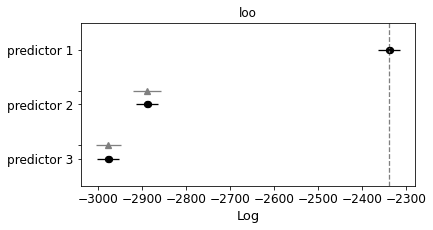

In [127]:
comp_df = az.compare({"predictor 1": idata_pred_1, "predictor 2": idata_pred_2, "predictor 3": idata_pred_3}, ic="loo")
print(f"comparison table:\n{comp_df}")
az.plot_compare(comp_df)
plt.title('loo')

comparison table:
             rank         waic    p_waic      d_waic        weight         se  \
predictor 1     0 -2339.368217  2.027546    0.000000  9.722557e-01  25.550945   
predictor 2     1 -2888.417814  1.879991  549.049597  2.774428e-02  24.758546   
predictor 3     2 -2976.646008  1.931426  637.277792  8.409938e-10  24.970154   

                   dse  warning waic_scale  
predictor 1   0.000000    False        log  
predictor 2  32.445281    False        log  
predictor 3  28.508304    False        log  


Text(0.5, 1.0, 'waic')

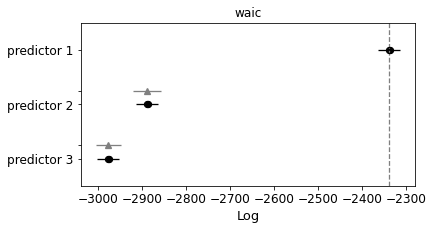

In [128]:
comp_df = az.compare({"predictor 1": idata_pred_1, "predictor 2": idata_pred_2, "predictor 3": idata_pred_3}, ic="waic")
print(f"comparison table:\n{comp_df}")
az.plot_compare(comp_df)
plt.title('waic')